Epoch: 0001 cost= 3.133099079 W= 0.655706 b= 0.565988
Epoch: 0051 cost= 0.081469797 W= 0.287202 b= 0.530914
Epoch: 0101 cost= 0.080949716 W= 0.284965 b= 0.547005
Epoch: 0151 cost= 0.080489837 W= 0.282861 b= 0.56214
Epoch: 0201 cost= 0.080083199 W= 0.280883 b= 0.576375
Epoch: 0251 cost= 0.079723656 W= 0.279022 b= 0.589763
Epoch: 0301 cost= 0.079405755 W= 0.277271 b= 0.602355
Epoch: 0351 cost= 0.079124711 W= 0.275625 b= 0.614198
Epoch: 0401 cost= 0.078876272 W= 0.274077 b= 0.625335
Epoch: 0451 cost= 0.078656629 W= 0.272621 b= 0.635809
Epoch: 0501 cost= 0.078462481 W= 0.271251 b= 0.645661
Epoch: 0551 cost= 0.078290835 W= 0.269964 b= 0.654926
Epoch: 0601 cost= 0.078139096 W= 0.268752 b= 0.663641
Epoch: 0651 cost= 0.078004964 W= 0.267613 b= 0.671838
Epoch: 0701 cost= 0.077886410 W= 0.266541 b= 0.679547
Epoch: 0751 cost= 0.077781618 W= 0.265533 b= 0.686798
Epoch: 0801 cost= 0.077689052 W= 0.264585 b= 0.693617
Epoch: 0851 cost= 0.077607200 W= 0.263694 b= 0.700032
Epoch: 0901 cost= 0.077534877

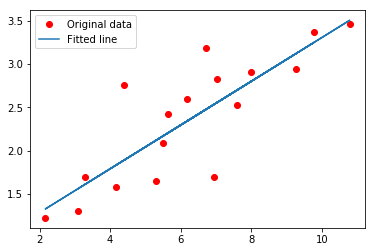

In [1]:
__author__ = 'han'
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Create Model

# Set model weights
W = tf.Variable(rng.random(), name="weight")
b = tf.Variable(rng.random(), name="bias")

# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# Initializing the variables
#init = tf.initialize_all_variables()
init =tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()